In [1]:
import sklearn as sk 
from sklearn import preprocessing as p
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.transform import resize
import cv2
import math
import statistics as stat
from PIL import Image
import os
import csv
from sklearn.metrics import accuracy_score

# LISTE DES PATHS/Noms des caractères

In [64]:
listedespaths=[]
path = 'CASIA-HWDB_Train' #path dans le repertoire de fichier
files = os.listdir(path) #recupere les files s'y trouvant
for name in files:
    listedespaths.append(name)
    print(name)
#liste des noms
le=p.LabelEncoder() 
le.fit(listedespaths)
classes=le.transform(listedespaths)
# j'ai transformé les noms en chiffre car il y avait des conflits car les noms de fichiers n'étaient pas dans un encodage commun
print(classes)
print(len(classes))

ň«¬
ň«á
ň«â
ň«ä
ň«Ç
ň«ë
ň«í
ň«î
ň«ô
ň«Ö
ň«×
ň«Ą
ň«Ć
ň«Č
ň«Ľ
ň«ł
ň«│
ň«┐
ň«┤
ň«╣
ň«░
[ 0  4  5  6  1  7  8  9 10  2  3 11 12 13 14 15 16 17 18 19 20]
21
<class 'numpy.ndarray'>


In [65]:
# utilitaire
def imageOpener(s):
    im = Image.open(s)
    im=im.convert('L')
    im=np.array(im)
    return im

In [66]:
# return la shape de l'image
def tupleLargeurhauteur(s):
    im = Image.open(s)
    im=im.convert('L')
    im=np.array(im)
    return im.shape
print(tupleLargeurhauteur('CASIA-HWDB_Train\ň«¬\\1.png'))

(61, 62)


In [67]:
def largeurhauteurdesimagesparcaractere(filename):
    hauteur=[]
    largeur=[]
    for i in range(1,600):
        try :
            s='CASIA-HWDB_Train\\'+filename+'\\'+str(i)+'.png'
            tupleLargeurhauteur(s)
            hauteur.append(tupleLargeurhauteur(s)[0])
            largeur.append(tupleLargeurhauteur(s)[1])
        except :
            continue
    moylong=stat.mean(hauteur)
    moylarg=stat.mean(largeur)
    ectplong=np.std(hauteur)
    ectplarg=np.std(largeur)
    maxlong=max(hauteur)
    maxlarg=max(largeur)
    return (ectplong,ectplarg,maxlong,maxlarg)

#ici on cherche a determiner la taille des images et 
#l'écart type de leur taille pour savoir si on pourra juste les contourer en blanc (grand ecart type => pas contourer)

In [68]:
listedesdetails=[]
for i in listedespaths:
    listedesdetails.append(largeurhauteurdesimagesparcaractere(i))
    print
def MoyenneEtMax(listeAvecTuplede4):
    listeectplong=[]
    listeectplarg=[]
    listemaxlong=[]
    listemaxlarg=[]
    for k in range(len(listeAvecTuplede4)) :
        listeectplong.append(listeAvecTuplede4[k][0])
        listeectplarg.append(listeAvecTuplede4[k][1])
        listemaxlong.append(listeAvecTuplede4[k][2])
        listemaxlarg.append(listeAvecTuplede4[k][3])
    moyectplong=stat.mean(listeectplong)
    moyectplarg=stat.mean(listeectplarg)
    maxlong=max(listemaxlong)
    maxlarg=max(listemaxlarg)
    return moyectplong,moyectplarg,maxlong,maxlarg

print(MoyenneEtMax(listedesdetails))
## écart type pas trop grand on peut contourer
# on note les deux derniers chiffres qui sont les vals max de hauter/largeur des image dans tout le dataset

f
(13.916786439389774, 11.353012779499524, 210, 179)


In [69]:
matricebase=np.ones((210,179))
matricebase=matricebase*255
print(matricebase)
#on crer une matrice blanche de cette taille

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [70]:
def countourageBlanc(matricecharac, matriceref) :
    disthauteur=math.ceil((len(matriceref)-len(matricecharac))/2) # .ceil pour éviter les demis pixels ;)
    distlargeur=math.ceil((len(matriceref[0])-len(matricecharac[0]))/2)
    matriceref[disthauteur:disthauteur+len(matricecharac), distlargeur:distlargeur+len(matricecharac[0])] = matricecharac
    return matriceref
            
#fonction pour centrer nos images au milieu de cette matrice blanche

#    Plot d'une image

94
68
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


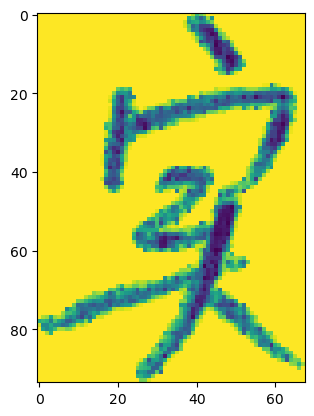

In [71]:
# test de plotting pour une image
img = np.asarray(Image.open('CASIA-HWDB_Train\Test\ň«×\9.png'))
print(len(img))
print(len(img[0]))
print(img)
imgplot = plt.imshow(img)

# Normalisation

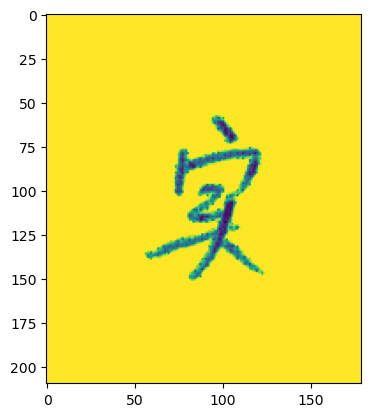

In [72]:
# test d'une normalisation
imgtest = countourageBlanc(img, matricebase)
imgplot = plt.imshow(imgtest)

# Creation de CSV avec les matrices applaties des images (attention très lourd)

In [73]:
#FAIT UNE LISTE COMPOSEE DE CHAQUE IMAGE MISE A PLAT (1D)
def creerImage1D(imagepath,matricebase):
    img = imageOpener(imagepath)
    matricecontouree=countourageBlanc(img, matricebase)
    matrice1D=matricecontouree.flatten().tolist()
    return matrice1D

#creer un index (noms des colonnes)

def creerindexpixels():
    return ['class']+['index' + str(i) for i in range(0, 210*179)]

index=creerindexpixels()

print('nombre de cols : ', len(index))

#cree la liste de toutes les matrices du dataset en 1D

def creerlistedesmatrices1Dpourunfichier(listedesmatrices,nomfichier,index,matricebase,classe):
  
    for i in range(1,600): #600 nombre d'images max pour un caractère
        try :
            imagepath='CASIA-HWDB_Train\\'+nomfichier+'\\'+str(i)+'.png'
            matrice1D=creerImage1D(imagepath,matricebase)
            if(matrice1D):
                matrice1D.insert(0, classe)
                listedesmatrices.append(matrice1D)
        except :
            continue
    return listedesmatrices

# params
matricebase=np.ones((210,179))
matricebase=matricebase*255
index=creerindexpixels()
classes = classes.tolist()
########################################################################################
# WARNING la creation est assez rapide pour 1 2 ou 3 mais ralenti fortement ensuite !!!
########################################################################################

classes=classes[0:2] #ficheir Csv 2classes
# classes=classes[0:3] #ficheir CSv 3classes
# classes=classes[0:4] #ficheir CSv 4classes
#classes=classes[0:7] #ficheir CSv 5classes
print('nombre de classes :' len(classes))
#start tous les fichiers

listedesmatrices=[]
listedesmatrices.append(index)

#pour faire toutes les classes

for j in range(len(classes)) :
    path=listedespaths[j]
    classe=classes[j]
    listedesmatrices=creerlistedesmatrices1Dpourunfichier(listedesmatrices,path,index,matricebase,classe)
    
print('nombre de photos :' len(listedesmatrices))
      
# writer dans csv file   
#renommer pixelstrainXclasse comme vous le souhaitez
with open('pixelstrainXclasse.csv', mode='w', newline='') as fichier_csv:
    writer = csv.writer(fichier_csv, delimiter=',')    # Écriture des en-têtes
    writer.writerow(listedesmatrices[0])    # Écriture des valeurs de pixel
    for pixels in listedesmatrices[1:]:
        writer.writerow(pixels)
     

37591
[0, 4, 5, 6, 1, 7, 8]
3831


In [ ]:
# la mise dans le buffer est très lente 

# Lecture du fichier CSV avec les paramètres spécifiés
data = pd.read_csv('pixelstrain7classe.csv')
print('fini')

In [ ]:
#on commence la partie M-L

from sklearn.model_selection import train_test_split

x = data.drop(columns='class')
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
# X.pca

from sklearn.decomposition import PCA

n_components = 50 # taille du vecteur, on vise petit pour ne pas overfit et avoir suffisament de datas par rapport aux cols
pca = PCA(n_components=n_components)

# Application de la pca sur nos datas
x_train_pca = pca.fit_transform(x_train)

# print(x_train_pca[0])


In [ ]:
#ici on peut voir les consequences de la pca sur la photo d'origine (sa projection à nouveau)
x_train_reconstructed = np.dot(x_train_pca, pca.components_) + pca.mean_
img=x_train_reconstructed[0].reshape(210, 179)
imgplot = plt.imshow(img)

In [ ]:
x_test_pca = pca.fit_transform(x_test)

#  SVC

In [ ]:
# SVC Ker linear

from sklearn.svm import SVC

# Créer un modèle SVC
modelSVClin = SVC(kernel="linear")

# Entraîner le modèle sur les données PCA transformées
modelSVClin.fit(x_train_pca, y_train)

y_pred = modelSVClin.predict(x_test_pca)
# Calculer la précision du modèle
accuracySVC1 = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracySVC1 * 100))

In [ ]:
#SVC Ker Polynomial

# Créer un modèle SVC
modelSVCpoly = SVC(kernel="poly", degree=4)

# Entraîner le modèle sur les données PCA transformées
modelSVCpoly.fit(x_train_pca, y_train)

y_pred = modelSVCpoly.predict(x_test_pca)

# Calculer la précision du modèle
accuracySVC2 = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracySVC2 * 100))

In [ ]:
#SVC Ker rbf

# Créer un modèle SVC
modelSVCrbf = SVC(kernel="rbf", gamma='scale')

# Entraîner le modèle sur les données PCA transformées
modelSVCrbf.fit(x_train_pca, y_train)

y_pred = modelSVCrbf.predict(x_test_pca)

# Calculer la précision du modèle
accuracySVC3 = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracySVC3 * 100))

In [ ]:
#SVC Ker Sig

# Créer un modèle SVC
modelSVCSig = SVC(kernel="sigmoid")

# Entraîner le modèle sur les données PCA 
modelSVCSig.fit(x_train_pca, y_train)

y_pred = modelSVCSig.predict(x_test_pca)

# Calculer la précision du modèle
accuracySVC4 = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracySVC4 * 100))

In [ ]:
#Representation Graphique fonction des hyperparamètres ker pour SVC

# Définir les hyperparamètres à tester
hyperparam_values = ['linear', 'poly', 'rbf','sigmoid']

#Liste stockant les performances
performances = [accuracySVC1, accuracySVC2, accuracySVC3,accuracySVC4]

#Traçage le graphique
plt.plot(hyperparam_values, performances, marker='o')
plt.xlabel('Type de noyau')
plt.ylabel('% Prédit')
plt.title('Performances de l\'algorithme SVC en fonction des hyperparamètres')
plt.grid(True)
plt.show()


#  K+1 voisins

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_pca, y_train)

y_pred = knn.predict(x_test_pca)

# Calculer la précision du modèle
accuracyKneighboor = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracyKneighboor * 100))
 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Définir les valeurs de k à tester
param_grid = {
    'n_neighbors': [2, 7, 9, 11, 21, 55, 67, 100, 150,300]
}

# Créer le modèle k-plus-proches voisins
model = KNeighborsClassifier()

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Effectuer la recherche d'hyperparamètres
grid_search.fit(x_train_pca, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleur nombre pour K+1 voisins : ", grid_search.best_params_)

# Obtenir les prédictions sur l'ensemble de test
y_pred = grid_search.predict(x_test_pca)

# Afficher le rapport de classification
print("Rapport de classification : ")
print(classification_report(y_test, y_pred))


In [ ]:
#Representation Graphique fonction des hyperparamètres

# Définir les hyperparamètres à tester
hyperparam_values = [2, 7, 9, 11, 21, 55, 67, 100, 150]

# Liste pour stocker les performances
performances = []

# Boucle sur les différentes valeurs des hyperparamètres
for hyperparam in hyperparam_values:
    # Initialiser et entraîner le modèle avec l'hyperparamètre donné
    modele = KNeighborsClassifier(n_neighbors=hyperparam)
    modele.fit(x_train_pca, y_train)
    
    # Évaluer les performances du modèle sur l'ensemble de test
    score = modele.score(x_test_pca, y_test)
    
    # Ajouter le score à la liste des performances
    performances.append(score)

# Tracer le graphique
plt.plot(hyperparam_values, performances, marker='o')
plt.xlabel('nombre de voisins')
plt.ylabel('% Prédit')
plt.title('Performances de l\'algorithme K+1 Neighboor en fonction des hyperparamètres')
plt.grid(True)
plt.show()


# Random Forest

In [ ]:
#X.randomforests

from sklearn.ensemble import RandomForestClassifier

modeleRandomForest = RandomForestClassifier(n_estimators=55)

# Entraînement du classificateur
modeleRandomForest.fit(x_train_pca, y_train)

# Prédiction sur l'ensemble de test
y_pred = modeleRandomForest.predict(x_test_pca)

# Calcul de l'exactitude (accuracy)
accuracyRF = accuracy_score(y_test, y_pred)
print("Exactitude : ", accuracyRF*100)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#trouver le best param en en testant une liste 

# Définir les valeurs de k à tester
param_grid = {
    'n_estimators': [2, 7, 9, 11, 21, 55, 67, 100, 150]
}

# Créer le modèle k-plus-proches voisins
model = RandomForestClassifier()

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Effectuer la recherche d'hyperparamètres
grid_search.fit(x_train_pca, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleur nombre de forest : ", grid_search.best_params_)

# Obtenir les prédictions sur l'ensemble de test
y_pred = grid_search.predict(x_test_pca)

# Afficher le rapport de classification
print("Rapport de classification : ")
print(classification_report(y_test, y_pred))


In [ ]:
#Representation Graphique fonction des hyperparamètres

# Définir les hyperparamètres à tester
hyperparam_values = [2, 7, 9, 11, 21, 55, 67, 100, 150]

# Liste pour stocker les performances
performances = []

# Boucle sur les différentes valeurs des hyperparamètres
for hyperparam in hyperparam_values:
    # Initialiser et entraîner le modèle avec l'hyperparamètre donné
    modele = RandomForestClassifier(n_estimators=hyperparam)
    modele.fit(x_train_pca, y_train)
    
    # Évaluer les performances du modèle sur l'ensemble de test
    score = modele.score(x_test_pca, y_test)
    
    # Ajouter le score à la liste des performances
    performances.append(score)

# Tracer le graphique
plt.plot(hyperparam_values, performances, marker='o')
plt.xlabel('nombre d\'arbres')
plt.ylabel('% Prédit')
plt.title('Performances de l\'algorithme Random Forest en fonction des hyperparamètres')
plt.grid(True)
plt.show()